In [1]:
## Purpose of Script:
#### basic tutorial for ACF (autocorrelation function) and PACF (partial autocorrelation function)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
df_ice_cream = pd.read_csv('../Datasets/ice_cream.csv')
df_ice_cream.head(2)

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605


In [4]:
df_ice_cream.rename(columns={'DATE':'date', 'IPN31152N':'production'}, inplace=True)

df_ice_cream['date'] = pd.to_datetime(df_ice_cream.date)

df_ice_cream.set_index('date', inplace=True)

start_date = pd.to_datetime('2010-01-01')
df_ice_cream = df_ice_cream[start_date:]

print(df_ice_cream.shape)
df_ice_cream.head(2)

(121, 1)


,production
date,
2010-01-01,91.2895
2010-02-01,110.4994


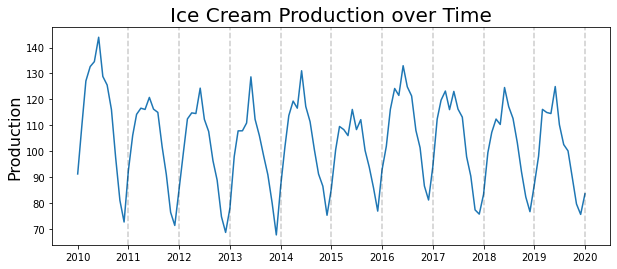

In [5]:
plt.figure(figsize=(10,4))
plt.plot(df_ice_cream.production)
plt.title('Ice Cream Production over Time', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(2011,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

## ACF

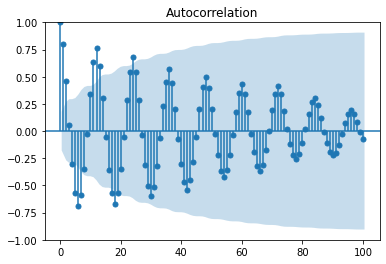

In [6]:
acf_plot = plot_acf(df_ice_cream.production, lags=100)

## shaded blue area is the error band
## bases on decaying ACF, we are likely dealing with an auto regressive process
## we do see a cycle overtime
## lag is on the x axis
## we see that by a lag of 30, the relationship is no longer statistically significant

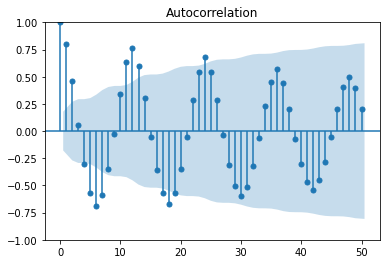

In [7]:
acf_plot = plot_acf(df_ice_cream.production, lags=50)

## PACF

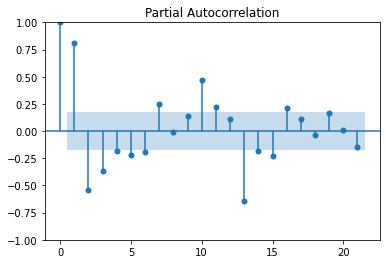

In [11]:
pacf_plot = plot_pacf(df_ice_cream.production, method='yw')

## strong relationship at x == 1 (x == 0 is relationship to itself so will always have value of 1)
## from this graph, we should start with an auto gressive model with lags of 1,2,3,10,13
## ACF and PACF give us a good ideal for where to start with a time times analysis